导论作业8
秦鑫成 10235501453

*数据探索与可视化* 

实验目标  
学习并掌握如何使用Python进行数据探索与可视化。  
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。  
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。  
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。  

1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import numpy as np

# 读取数据集
data = pd.read_csv("github_bot_processed_data.csv")

# 探索pandas的显示选项，设置显示更多的行和列
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 使用head()方法查看数据的前几行
print("数据的前几行：")
print(data.head())

# 使用info()方法查看每列的数据类型
print("\n每列的数据类型：")
print(data.info())

# 使用describe()方法生成数据的描述性统计信息
print("\n描述性统计信息：")
print(data.describe())

# 数据格式化处理，这里不再对不存在的date_column列进行操作
# 而是直接对已有的created_at和updated_at列进行格式化处理
data['created_at'] = pd.to_datetime(data['created_at']).dt.strftime('%Y-m-d')
data['updated_at'] = pd.to_datetime(data['updated_at']).dt.strftime('%Y-m-d')

print("\n格式化后的数据示例：")
print(data[['created_at', 'updated_at']].head())

# 确保public_repos、followers列的值大于0，避免取对数时出现问题
# 同时处理可能出现的inf值，将其转换为NaN
data = data[(data['public_repos'] > 0) & (data['followers'] > 0)]
data['public_repos'] = data['public_repos'].replace([np.inf, -np.inf], np.nan)
data['followers'] = data['followers'].replace([np.inf, -np.inf], np.nan)

# 对public_repos、public_gists、followers、following等列进行对数变换
data['log_public_repos'] = np.log(data['public_repos'])
data['log_public_gists'] = np.log(data['public_gists'])
data['log_followers'] = np.log(data['followers'])
data['log_following'] = np.log(data['following'])

# 使用Matplotlib绘制图表

# 绘制条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
data['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Category Distribution')
plt.show()

# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布
bool_features = ['site_admin', 'company']
data[bool_features['sum'].plot(kind='bar', stacked=True)
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Distribution of Boolean Features')
plt.show()

# 绘制直方图：展示log_public_repos的对数变换后的数据分布
plt.figure(figsize=(10, 6))
plt.hist(data['log_public_repos'], bins=20)
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.title('Distribution of Log Public Repos')
plt.show()

# 绘制散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'])
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.title('Relationship between Public Repos and Followers')
plt.show()

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
pd.plotting.scatter_matrix(data[numeric_features], figsize=(10, 10))
plt.show()

# 使用Seaborn绘制图表

# 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution of Log Followers by Label')
plt.show()

# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
g = sns.pairplot(data, vars=['public_repos', 'public_gists', 'followers', 'following'], hue='label')
g.fig.suptitle('Pairwise Relationships between Features by Label', y=1.02)
plt.show()

# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
correlation_matrix = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Log Features')
plt.show()

# 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution Difference between Label and Log Followers')
plt.show()

# 处理ydata_profiling中自相关计算可能出现的问题，先将可能导致问题的inf值转换为NaN
data = data.replace([np.inf, -np.inf], np.nan)

# 使用ydata_profiling生成交互式数据分析报告，禁用自相关计算以避免警告（可根据需求决定是否重新启用）
profile = ProfileReport(data, title="Data Profile Report", correlations={"auto": {"calculate": False}})
profile.to_file("data_profile_report.html")

# 根据提示升级Pillow库（需在命令行执行以下命令，这里仅作说明）
# pip install --upgrade Pillow

##### 2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。  

In [14]:
# 使用head()方法查看数据的前几行
print("数据的前几行：")
print(data.head())

# 使用info()方法查看每列的数据类型
print("\n每列的数据类型：")
print(data.info())

# 使用describe()方法生成数据的描述性统计信息
print("\n描述性统计信息：")
print(data.describe())


数据的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

##### 3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。 

TypeError: expected string or bytes-like object, got 'float'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12748\2297882062.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][mask] = pd.NaT


TypeError: expected string or bytes-like object, got 'float'

In [ ]:

date_columns = ['created_at', 'updated_at']
for column in date_columns:
    def process_date(date_str):
        match = re.match(r'(\d{4})-m-d', date_str)
        if match:
            year = int(match.group(1))
            # 假设月份和日期部分缺失时，都默认填充为1
            month = 1
            day = 1
            return pd.Timestamp(year, month, day)
        return pd.NaT

    data[column] = data[column].map(process_date)
    data[column] = data[column].dt.strftime('%Y-%m-%d %H:%M:%S')

# 之后可以继续进行你原本计划的其他数据分析操作，比如查看数据等
print(data['created_at'].head())
print(data['updated_at'].head())

NameError: name 're' is not defined

##### 4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。  

In [16]:
# 确保public_repos、followers列的值大于0，避免取对数时出现问题
# 同时处理可能出现的inf值，将其转换为NaN
data = data[(data['public_repos'] > 0) & (data['followers'] > 0)]
data['public_repos'] = data['public_repos'].replace([np.inf, -np.inf], np.nan)
data['followers'] = data['followers'].replace([np.inf, -np.inf], np.nan)

# 对public_repos、public_gists、followers、following等列进行对数变换
data['log_public_repos'] = np.log(data['public_repos'])
data['log_public_gists'] = np.log(data['public_gists'])
data['log_followers'] = np.log(data['followers'])
data['log_following'] = np.log(data['following'])


d:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### 5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。  
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。  
绘制直方图：展示log_public_repos的对数变换后的数据分布。  
绘制散点图：展示public_repos与followers之间的关系。  
绘制散点矩阵：展示多个数值型特征之间的成对关系。  

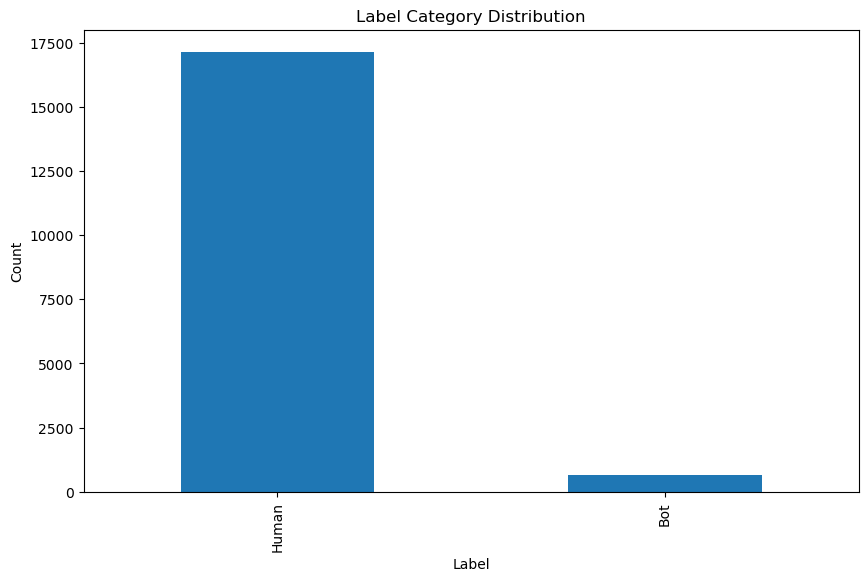

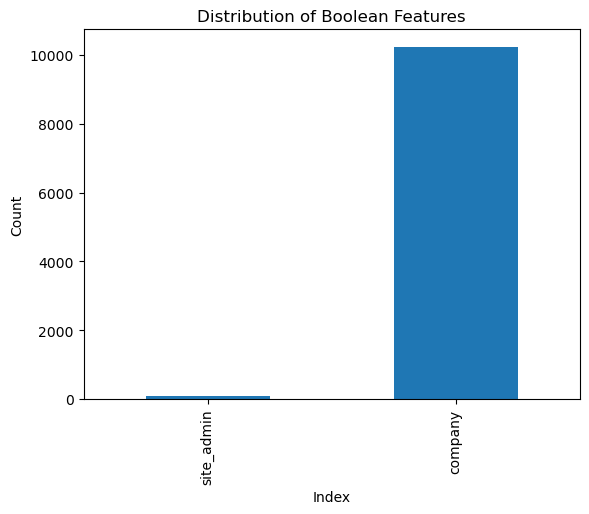

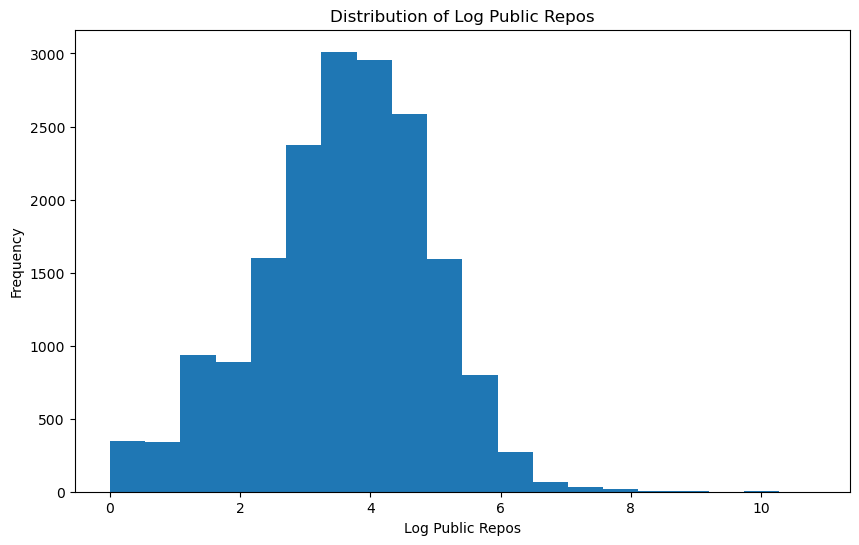

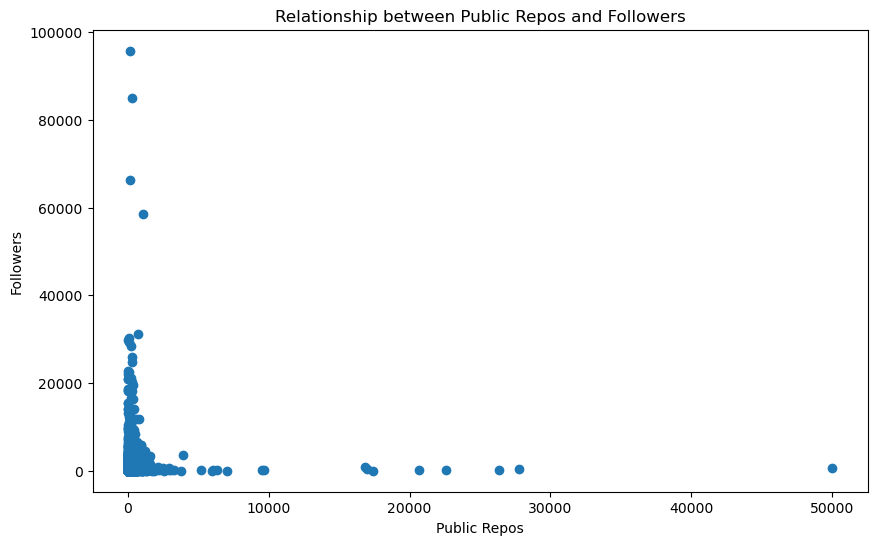

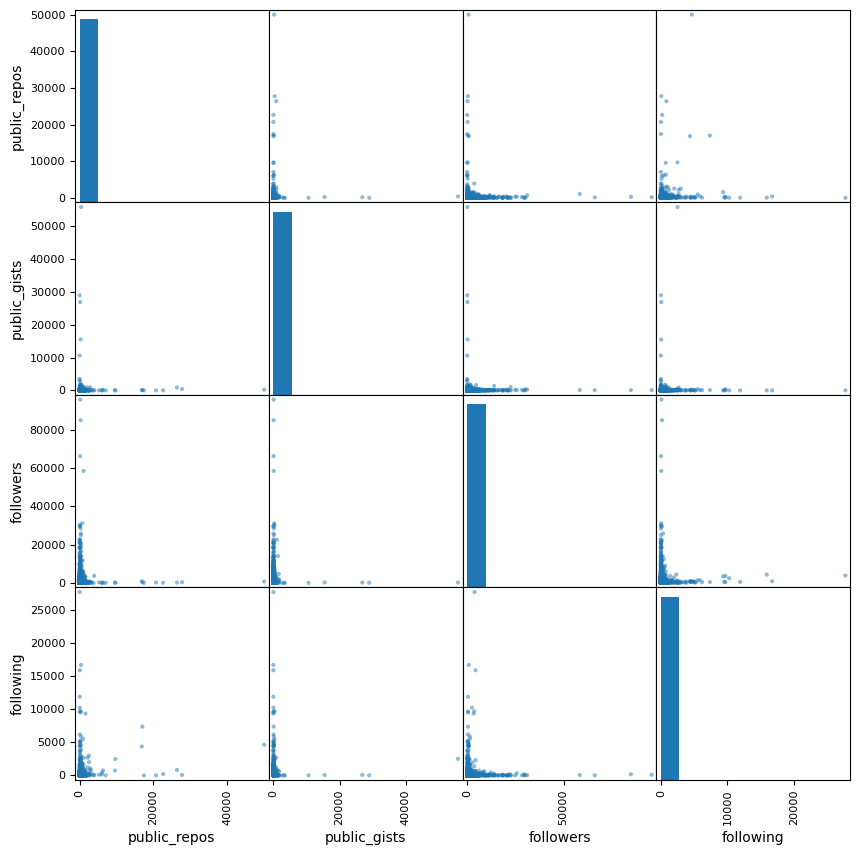

In [17]:

# 使用Matplotlib绘制图表

# 绘制条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
data['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Category Distribution')
plt.show()

# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布
bool_features = ['site_admin', 'company']
data[bool_features].sum().plot(kind='bar', stacked=True)
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Distribution of Boolean Features')
plt.show()

# 绘制直方图：展示log_public_repos的对数变换后的数据分布
plt.figure(figsize=(10, 6))
plt.hist(data['log_public_repos'], bins=20)
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.title('Distribution of Log Public Repos')
plt.show()

# 绘制散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'])
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.title('Relationship between Public Repos and Followers')
plt.show()

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
pd.plotting.scatter_matrix(data[numeric_features], figsize=(10, 10))
plt.show()

##### 6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。  
绘制成对图：展示不同特征之间的成对关系，并根据label分类。  
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。  
绘制小提琴图：展示label与log_followers之间的分布差异。  
使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。  

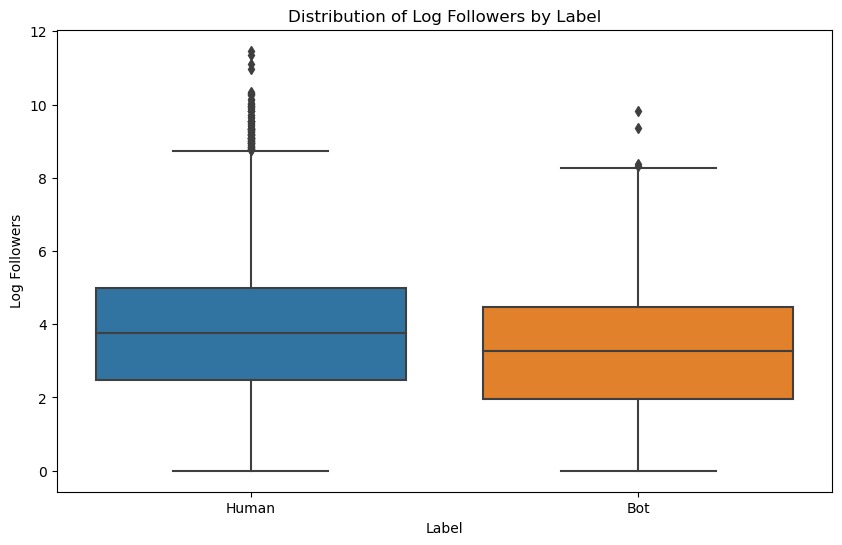

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

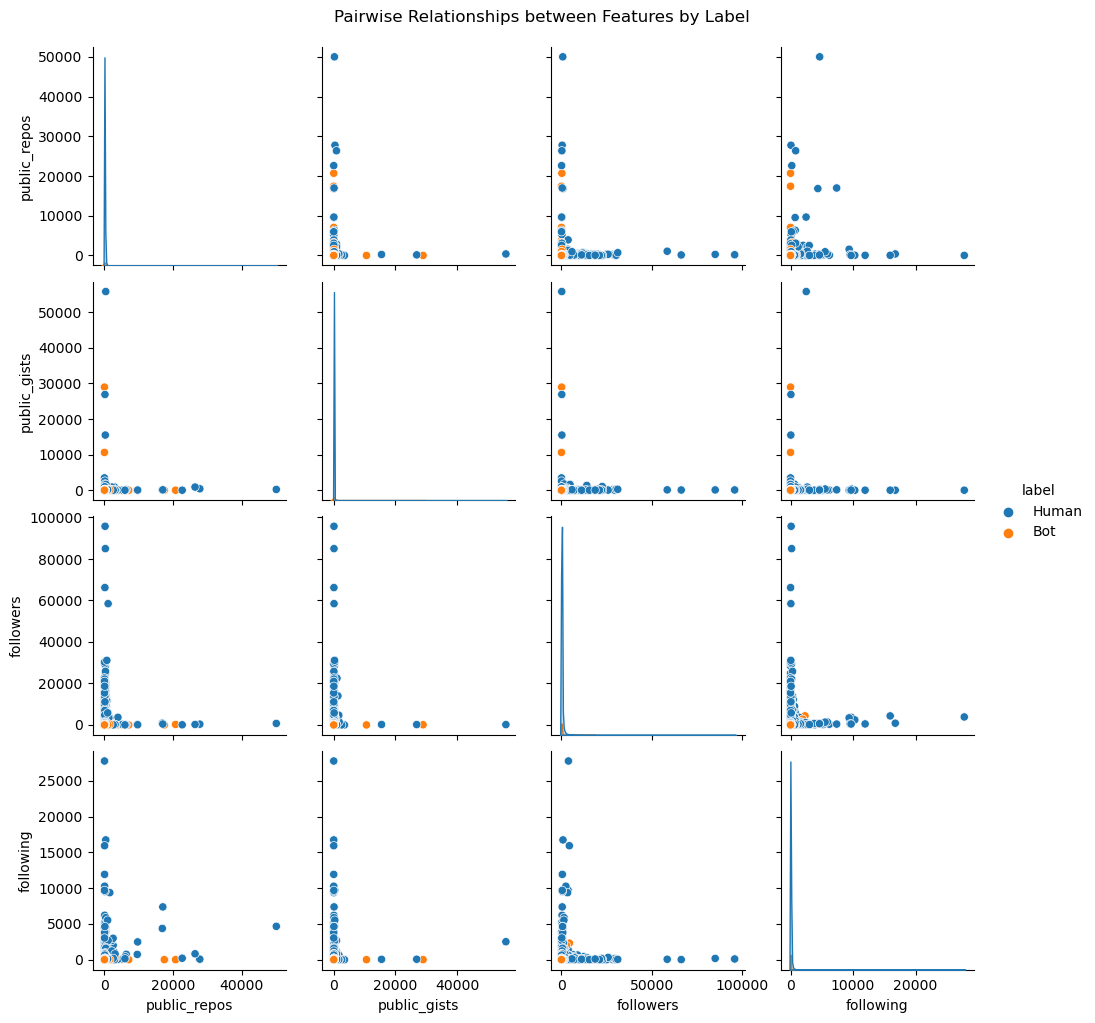

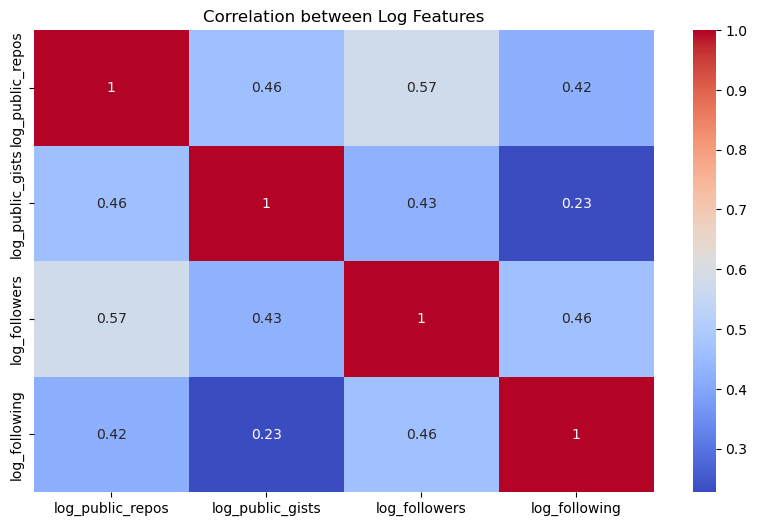

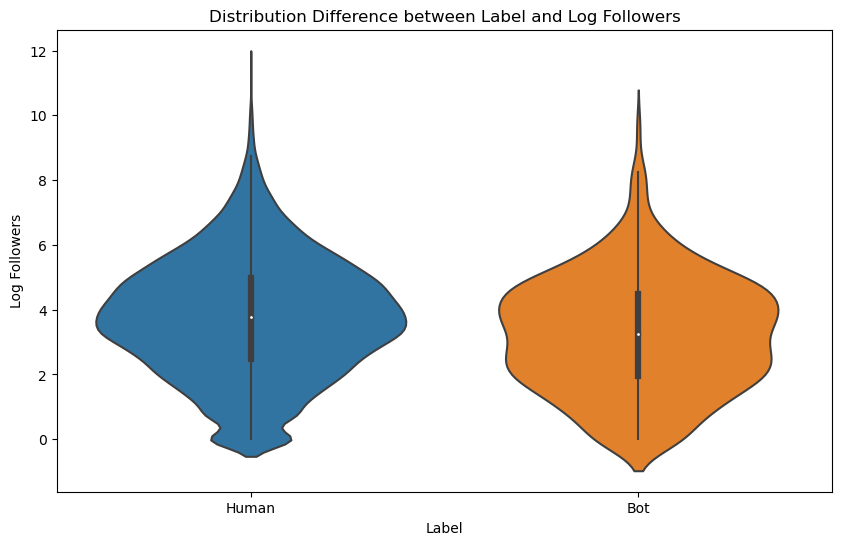

d:\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:

# 使用Seaborn绘制图表

# 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution of Log Followers by Label')
plt.show()

# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
g = sns.pairplot(data, vars=['public_repos', 'public_gists', 'followers', 'following'], hue='label')
g.fig.suptitle('Pairwise Relationships between Features by Label', y=1.02)
plt.show()

# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
correlation_matrix = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Log Features')
plt.show()

# 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution Difference between Label and Log Followers')
plt.show()

# 处理ydata_profiling中自相关计算可能出现的问题，先将可能导致问题的inf值转换为NaN
data = data.replace([np.inf, -np.inf], np.nan)

# 使用ydata_profiling生成交互式数据分析报告，禁用自相关计算以避免警告（可根据需求决定是否重新启用）
profile = ProfileReport(data, title="Data Profile Report", correlations={"auto": {"calculate": False}})
profile.to_file("data_profile_report.html")

# 根据提示升级Pillow库（需在命令行执行以下命令，这里仅作说明）
# pip install --upgrade Pillow